Trabajar de pag 362 a 376

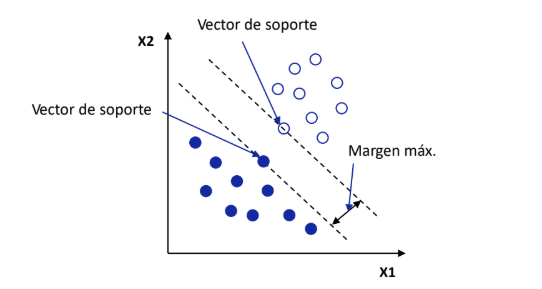

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay



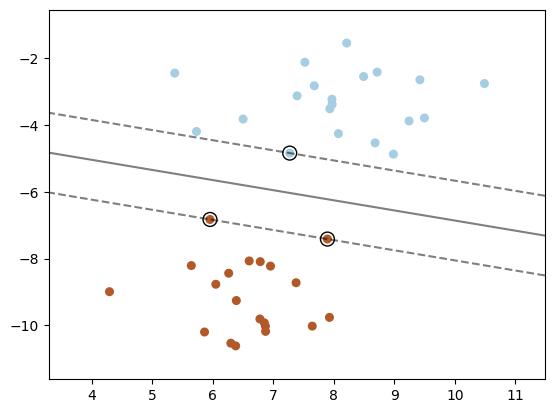

In [ ]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

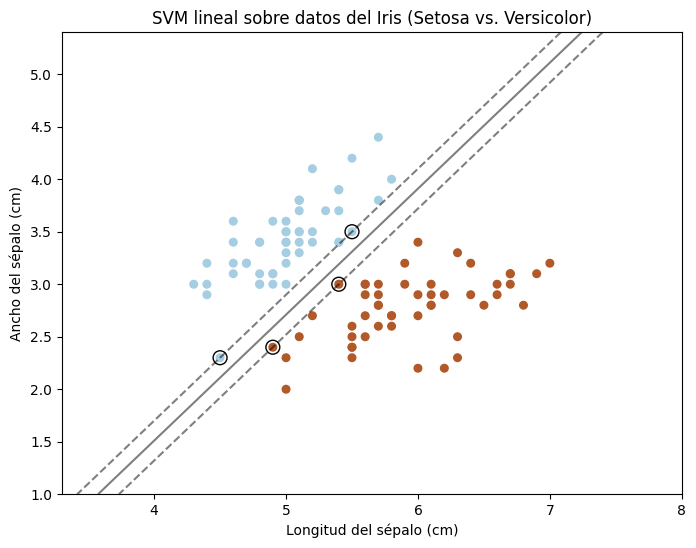

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay

# Cargar el dataset Iris
iris = load_iris()
X = iris.data[:, :2]  # Solo usamos las primeras 2 características: sepal length y sepal width
y = iris.target

# Filtrar solo dos clases para tener un problema binario
mask = y < 2  # clase 0 (setosa) y clase 1 (versicolor)
X = X[mask]
y = y[mask]

# Entrenar modelo SVM lineal
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

# Dibujar los vectores de soporte
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Ancho del sépalo (cm)")
plt.title("SVM lineal sobre datos del Iris (Setosa vs. Versicolor)")
plt.show()


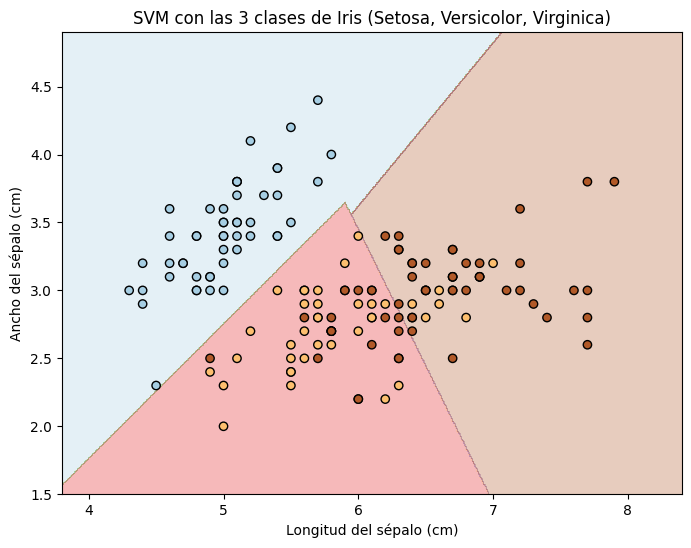

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
X = iris.data[:, :2]  # Usamos solo largo y ancho del sépalo
y = iris.target       # 3 clases: 0, 1 y 2

# Entrenar el modelo SVM con todas las clases
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# Crear una malla para graficar las regiones
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar las regiones de clasificación
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Dibujar los puntos de datos originales
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Ancho del sépalo (cm)")
plt.title("SVM con las 3 clases de Iris (Setosa, Versicolor, Virginica)")
plt.show()


In [ ]:
# Importamos las librerías necesarias
import numpy as np                    # Para trabajar con arreglos numéricos
import pandas as pd                  # Para manipulación de datos (aunque aquí no se usa mucho)
import matplotlib.pyplot as plt      # Para visualizar gráficos
import seaborn as sns                # Librería de visualización más elegante
import warnings                      # Para controlar advertencias del sistema

# Importamos funciones de scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV  # Para dividir los datos y buscar mejores parámetros
from sklearn.svm import SVC               # Support Vector Classifier
from sklearn import metrics               # Para medir la precisión del modelo
from sklearn.datasets import load_iris    # Cargamos el dataset Iris

# Ocultamos los warnings (como los de convergencia o de versiones)
warnings.filterwarnings(action='ignore')

# Esta línea es solo para notebooks (como Jupyter) para que los gráficos se muestren en línea
# Si estás en un script .py puedes omitirla o comentarla.
# %matplotlib inline

# -------------------------------
# Paso 1: Cargar el dataset Iris
# -------------------------------

data = load_iris()                # Carga el dataset Iris (flores con 4 características y 3 clases)

X = data['data']                  # Variables independientes (features): largo/ancho de sépalo y pétalo
columns = list(data['feature_names'])  # Nombres de las columnas
print(columns)                    # Muestra: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Y = data['target']                # Variable dependiente (0: setosa, 1: versicolor, 2: virginica)
labels = list(data['target_names'])   # ['setosa', 'versicolor', 'virginica']
print(labels)

# ----------------------------------------------------
# Paso 2: Dividir los datos en entrenamiento y prueba
# ----------------------------------------------------

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1234
)  # 70% entrenamiento, 30% prueba

# --------------------------------------------------------------
# Paso 3: Búsqueda de hiperparámetros óptimos para el modelo SVM
# --------------------------------------------------------------

# SVM con kernel RBF (Radial Basis Function = no lineal)
# Hiperparámetros importantes:
#   - C: penalización (controla margen vs errores)
#   - gamma: qué tan lejos llega la influencia de un solo punto

# Creamos una grilla de valores posibles para C y gamma
C_grid = 0.02 * np.arange(1, 20)       # C: de 0.02 hasta 0.38
gamma_grid = 0.02 * np.arange(1, 50)   # gamma: de 0.02 hasta 0.98

parameters = {'C': C_grid, 'gamma': gamma_grid}  # Diccionario con los parámetros a evaluar

# Búsqueda con validación cruzada de 10 pliegues
gridCV = GridSearchCV(
    SVC(kernel='rbf'),
    parameters,
    cv=10,          # 10-fold cross-validation
    n_jobs=-1       # Usa todos los núcleos del CPU
)

# Entrenamos el modelo buscando los mejores hiperparámetros
gridCV.fit(X_train, Y_train)

# Guardamos los mejores valores encontrados
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

# Mostramos los mejores valores encontrados
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

# ----------------------------------------------------------
# Paso 4: Entrenar el modelo SVM con los mejores parámetros
# ----------------------------------------------------------

SVM_best = SVC(kernel='rbf', C=best_C, gamma=best_gamma)  # Modelo con los mejores C y gamma
SVM_best.fit(X_train, Y_train)                            # Entrenamiento

# Hacemos predicciones con el conjunto de prueba
Y_pred = SVM_best.predict(X_test)

# Calculamos y mostramos la precisión del modelo
accuracy = np.round(metrics.accuracy_score(Y_test, Y_pred), 3)
print("SVM best accuracy : " + str(accuracy))


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
SVM best C : 0.2
SVM best gamma : 0.78
SVM best accuracy : 0.978


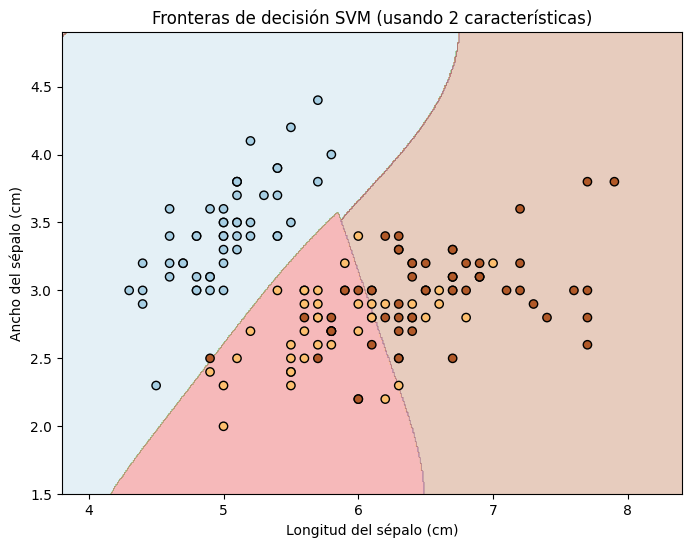

In [ ]:
# Reentrenamos el mejor modelo usando solo 2 características para visualizar
X_vis = X[:, :2]  # Solo largo y ancho del sépalo
X_train_vis, X_test_vis, Y_train_vis, Y_test_vis = train_test_split(X_vis, Y, test_size=0.3, random_state=1234)

# Entrenamos un nuevo SVM con los mismos hiperparámetros
SVM_vis = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
SVM_vis.fit(X_train_vis, Y_train_vis)

# Creamos la malla para dibujar regiones de decisión
x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predecimos la clase para cada punto de la malla
Z = SVM_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujamos las regiones de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

# Dibujamos los puntos reales
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Ancho del sépalo (cm)")
plt.title("Fronteras de decisión SVM (usando 2 características)")
plt.show()


In [ ]:
# Paso 1: Definimos los rangos de hiperparámetros que vamos a explorar

C_grid = 0.0001 * np.arange(1, 30)
# Creamos una lista de posibles valores para C (penalización). Va de 0.0001 a 0.0029
# C controla qué tanto penaliza el modelo los errores en entrenamiento (entre más alto, menos errores se permite)

gamma_grid = 0.01 * np.arange(1, 30)
# Lista de posibles valores para gamma (parámetro del kernel)
# Gamma define la influencia de un solo ejemplo: bajo = amplia influencia, alto = influencia cercana

parameters = {'C': C_grid, 'gamma': gamma_grid}
# Creamos un diccionario con los parámetros que queremos optimizar

# Paso 2: Usamos GridSearchCV para probar todas las combinaciones posibles de C y gamma

gridCV = GridSearchCV(
    SVC(kernel='poly'),     # Usamos un modelo SVM con kernel polinómico
    parameters,             # Conjunto de combinaciones de C y gamma
    cv=10,                  # Validación cruzada de 10 pliegues (el conjunto de entrenamiento se divide en 10 partes)
    n_jobs=-1               # Usa todos los núcleos del CPU para acelerar el proceso
)

# Entrenamos el modelo con la búsqueda de los mejores hiperparámetros
gridCV.fit(X_train, Y_train)

# Extraemos los mejores valores de C y gamma encontrados durante la búsqueda
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

# Mostramos los mejores parámetros encontrados
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

# Paso 3: Entrenamos el modelo final con los mejores hiperparámetros encontrados

SVM_best = SVC(kernel='poly', C=best_C, gamma=best_gamma)
# Creamos el clasificador con los hiperparámetros óptimos

SVM_best.fit(X_train, Y_train)
# Entrenamos el modelo con el conjunto de entrenamiento

# Paso 4: Evaluamos el modelo en el conjunto de prueba
Y_pred = SVM_best.predict(X_test)
# Hacemos predicciones con los datos de prueba

# Mostramos la precisión del modelo (proporción de aciertos)
print("SVM best accuracy : " + str(np.round(metrics.accuracy_score(Y_test, Y_pred), 3)))


SVM best C : 0.0007
SVM best gamma : 0.27
SVM best accuracy : 0.956


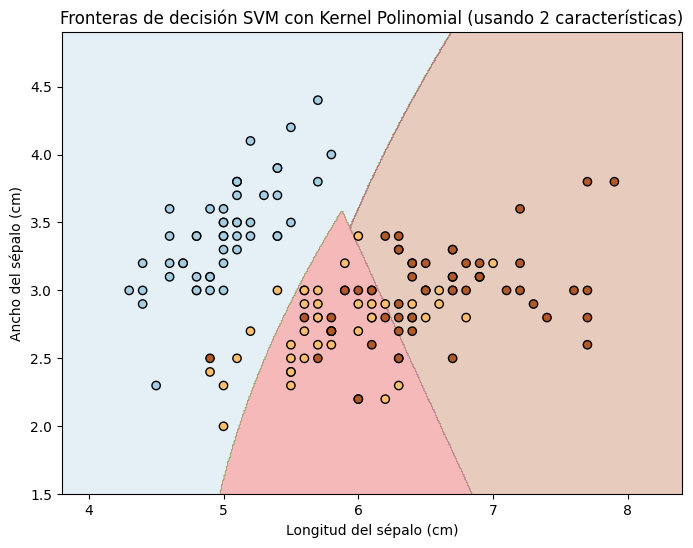

In [ ]:
# prompt: crea el grafico para el untimo

# Reentrenamos el mejor modelo usando solo 2 características para visualizar
X_vis = X[:, :2]
# Esto selecciona solo las dos primeras columnas del dataset original (longitud y ancho del sépalo)
# porque para graficar necesitamos trabajar en 2 dimensiones

X_train_vis, X_test_vis, Y_train_vis, Y_test_vis = train_test_split(
    X_vis, Y, test_size=0.3, random_state=1234
)
# Aquí dividimos los datos (solo con las 2 características seleccionadas) en entrenamiento y prueba (70%/30%)

# Entrenamos un nuevo SVM con los mismos hiperparámetros (pero con kernel polinomial)
SVM_vis_poly = SVC(kernel='poly', C=best_C, gamma=best_gamma)
# Creamos un modelo SVM con kernel polinómico, usando los mejores valores de C y gamma encontrados previamente

SVM_vis_poly.fit(X_train_vis, Y_train_vis)
# Entrenamos el modelo con los datos de entrenamiento visuales

# Creamos la malla (rejilla) de puntos sobre el plano para poder visualizar las regiones de decisión
x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
# Definimos el rango horizontal del gráfico (basado en la 1ª característica, con un margen extra)
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
# Definimos el rango vertical del gráfico (basado en la 2ª característica, también con margen)

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)
# Creamos una cuadrícula de puntos en el plano que cubre todo el gráfico
# Esto nos permitirá hacer predicciones sobre cada punto para colorear las regiones

# Predecimos la clase que el modelo asigna a cada punto de la malla
Z = SVM_vis_poly.predict(np.c_[xx.ravel(), yy.ravel()])
# Unimos las coordenadas de la malla y predecimos la clase usando el modelo entrenado
# np.c_ concatena las columnas xx e yy para hacer una lista de puntos [x1, y1], [x2, y2], etc.

Z = Z.reshape(xx.shape)
# Reconvertimos Z al formato de malla para que tenga la misma forma que xx e yy (necesario para graficar)

# Dibujamos las regiones de decisión coloreadas según la clase predicha
plt.figure(figsize=(8, 6))
# Creamos una nueva figura de 8x6 pulgadas
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
# Coloreamos cada zona de la malla según la clase predicha por el modelo
# alpha=0.3 hace que el color sea más transparente

# Dibujamos los puntos reales del dataset
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
# Mostramos los datos reales (flores) en el mismo plano, coloreados por su clase verdadera

plt.xlabel("Longitud del sépalo (cm)")
# Etiqueta del eje X
plt.ylabel("Ancho del sépalo (cm)")
# Etiqueta del eje Y
plt.title("Fronteras de decisión SVM con Kernel Polinomial (usando 2 características)")
# Título del gráfico

plt.show()
# Mostramos el gráfico final en pantalla



### 📊 Tabla: Comparación de Kernels en SVM

| **Kernel**     | **Nombre completo**                 | **Ecuación / Forma matemática**         | **Uso recomendado**                                   | **Ventajas**                                            | **Desventajas**                                            |
| -------------- | ----------------------------------- | --------------------------------------- | ----------------------------------------------------- | ------------------------------------------------------- | ---------------------------------------------------------- |
| **Lineal**     | Lineal                              | $K(x, x') = x^T x'$                     | Cuando los datos son linealmente separables           | Rápido, simple, interpretable                           | No funciona bien si los datos no son lineales              |
| **RBF**        | Radial Basis Function (o Gaussiano) | $K(x, x') = \exp(-\gamma \|x - x'\|^2)$ | Datos no lineales, clasificación general              | Muy flexible, trabaja bien en muchos casos              | Puede sobreajustar, requiere ajustar gamma y C             |
| **Polinomial** | Polinómico                          | $K(x, x') = (x^T x' + r)^d$             | Casos donde hay interacciones de alto orden           | Captura relaciones complejas, más interpretable que RBF | Más sensible a hiperparámetros (grado, r, C), más lento    |
| **Sigmoide**   | Sigmoidal o tipo MLP                | $K(x, x') = \tanh(\alpha x^T x' + c)$   | Inspirado en redes neuronales (parecido a perceptrón) | Se asemeja al comportamiento de una red neuronal simple | No siempre cumple condiciones de un kernel válido (no PSD) |

---

### 🧠 Aclaraciones:

* **γ (gamma)**: Controla la influencia de cada punto en RBF y sigmoide. Bajo = más suave, alto = más específico.
* **C**: Penaliza los errores. Bajo = margen más ancho, más tolerancia a errores; alto = modelo más estricto.
* **d**: Grado del polinomio. Aumentarlo permite capturar interacciones más complejas.
* **Sigmoide**: Aunque se puede usar, **no es tan común** en SVM modernos. Es más popular en redes neuronales.

---

### ✅ Recomendación rápida:

| Problema                                 | Kernel sugerido       |
| ---------------------------------------- | --------------------- |
| Datos separables linealmente             | Lineal                |
| Datos no lineales complejos              | RBF (el más flexible) |
| Datos con relaciones polinómicas         | Polinomial            |
| Cuando se quiere imitar una red neuronal | Sigmoide              |

---

Precisión del modelo (kernel='poly'): 0.933


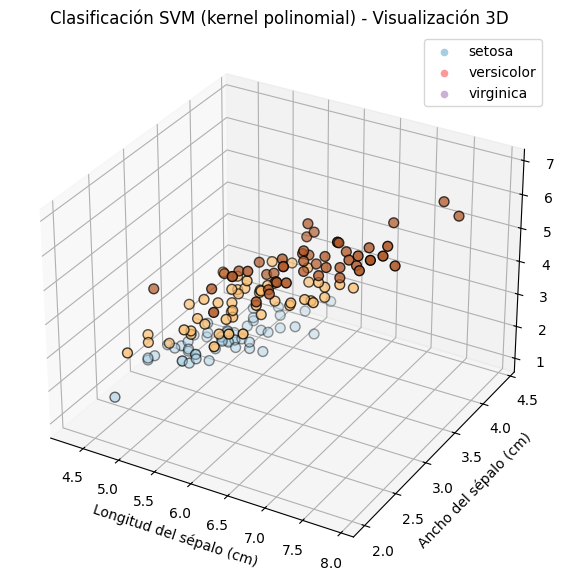

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para habilitar gráficos 3D
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Cargamos el dataset Iris
data = load_iris()
X = data.data[:, [0, 1, 2]]  # Usamos 3 características: sépalo largo, sépalo ancho, pétalo largo
Y = data.target              # Clases: 0, 1, 2

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

# Hiperparámetros polinómicos optimizados previamente (puedes ajustar estos valores si quieres)
best_C = 0.001
best_gamma = 0.15

# Entrenamos el modelo con kernel polinomial
model = SVC(kernel='poly', C=best_C, gamma=best_gamma)
model.fit(X_train, Y_train)

# Predecimos en el conjunto de prueba
Y_pred = model.predict(X_test)

# Mostramos precisión
print("Precisión del modelo (kernel='poly'):", np.round(metrics.accuracy_score(Y_test, Y_pred), 3))

# -----------------------------------------------
# Visualización 3D de los datos clasificados
# -----------------------------------------------

fig = plt.figure(figsize=(10, 7))                 # Crear figura 3D
ax = fig.add_subplot(111, projection='3d')        # Añadir un subplot en 3D

# Dibujar puntos de entrenamiento con color según la clase
scatter = ax.scatter(
    X[:, 0], X[:, 1], X[:, 2],
    c=Y, cmap=plt.cm.Paired, edgecolors='k', s=50
)

# Etiquetas de ejes
ax.set_xlabel('Longitud del sépalo (cm)')
ax.set_ylabel('Ancho del sépalo (cm)')
ax.set_zlabel('Longitud del pétalo (cm)')
ax.set_title('Clasificación SVM (kernel polinomial) - Visualización 3D')

# Leyenda (opcional)
legend_labels = data.target_names
for i, label in enumerate(legend_labels):
    ax.scatter([], [], [], c=plt.cm.Paired(i / 3), label=label)
ax.legend()

plt.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Cargar el dataset Iris
data = load_iris()
X = data.data[:, [0, 1, 2]]  # Usamos 3 características
Y = data.target              # Clases: 0, 1, 2
target_names = data.target_names

# División de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

# Entrenar modelo SVM con kernel polinomial
best_C = 0.001
best_gamma = 0.15

model = SVC(kernel='poly', C=best_C, gamma=best_gamma)
model.fit(X_train, Y_train)

# Predecir y mostrar precisión
Y_pred = model.predict(X_test)
print("Precisión del modelo (kernel='poly'):", np.round(metrics.accuracy_score(Y_test, Y_pred), 3))

# Visualización 3D interactiva con Plotly
fig = go.Figure()

colors = ['red', 'green', 'blue']

for i, class_name in enumerate(target_names):
    indices = np.where(Y == i)
    fig.add_trace(go.Scatter3d(
        x=X[indices, 0].flatten(),
        y=X[indices, 1].flatten(),
        z=X[indices, 2].flatten(),
        mode='markers',
        marker=dict(size=5, color=colors[i], line=dict(width=1)),
        name=class_name
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='Longitud del sépalo (cm)',
        yaxis_title='Ancho del sépalo (cm)',
        zaxis_title='Longitud del pétalo (cm)'
    ),
    title='Clasificación SVM (kernel polinomial) - Visualización 3D interactiva',
    legend=dict(x=0, y=1)
)

fig.show()


Precisión del modelo (kernel='poly'): 0.933


In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Cargar datos
data = load_iris()
X = data.data[:, [0, 1, 2]]
Y = data.target
target_names = data.target_names

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

# Modelo SVM con kernel polinomial
model = SVC(kernel='poly', C=0.001, gamma=0.15)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Precisión:", np.round(metrics.accuracy_score(Y_test, Y_pred), 3))

# Colores para las clases
colors = ['red', 'green', 'blue']

# === Gráfico interactivo ===
fig = go.Figure()

# Puntos reales
for i, class_name in enumerate(target_names):
    indices = np.where(Y == i)
    fig.add_trace(go.Scatter3d(
        x=X[indices, 0], y=X[indices, 1], z=X[indices, 2],
        mode='markers',
        marker=dict(size=5, color=colors[i], line=dict(width=1)),
        name=class_name
    ))

# === Rejilla para aproximar la frontera de decisión ===
# Creamos una malla 3D de puntos
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
z_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 30)

xx, yy, zz = np.meshgrid(x_range, y_range, z_range)
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
grid_pred = model.predict(grid)

# Agregamos puntos del grid coloreados según la predicción del modelo
fig.add_trace(go.Scatter3d(
    x=grid[:, 0], y=grid[:, 1], z=grid[:, 2],
    mode='markers',
    marker=dict(size=2, color=[colors[i] for i in grid_pred], opacity=0.05),
    name='Frontera de decisión (aproximada)',
    showlegend=False
))

# Ejes
fig.update_layout(
    scene=dict(
        xaxis_title='Longitud del sépalo',
        yaxis_title='Ancho del sépalo',
        zaxis_title='Longitud del pétalo'
    ),
    title='SVM con kernel polinomial - Frontera de decisión en 3D',
    legend=dict(x=0, y=1)
)

fig.show()


Precisión: 0.933


En el grafico de arriba no se puede agregar el iper plano ya que hay 3 clases, por lo que se necesitarian 2 o 3 hiperplanos. SI se puede mostrar cuando son solo 2 clases, ya que solo necesitaria graficar un hiperplano, a continuacion se grafica con solo 2 clases.

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar el dataset y filtrar solo 2 clases
data = load_iris()
X = data.data[:, [0, 1, 2]]  # 3 features
Y = data.target
class_names = data.target_names  # ['setosa', 'versicolor', 'virginica']

# Filtrar solo clases 0 (setosa) y 1 (versicolor)
mask = Y < 2
X = X[mask]
Y = Y[mask]

# Dividir datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

# Entrenar SVM lineal
model = SVC(kernel='linear')
model.fit(X_train, Y_train)

# Obtener coeficientes del plano (w0*x + w1*y + w2*z + b = 0)
w = model.coef_[0]
b = model.intercept_[0]

# Crear una malla de puntos para la superficie
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
xx, yy = np.meshgrid(x_range, y_range)

# Resolver para z: z = (-w0*x - w1*y - b) / w2
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

# Gráfico con Plotly
fig = go.Figure()

# Puntos de clase 0 (Setosa)
fig.add_trace(go.Scatter3d(
    x=X[Y == 0, 0], y=X[Y == 0, 1], z=X[Y == 0, 2],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Setosa'
))

# Puntos de clase 1 (Versicolor)
fig.add_trace(go.Scatter3d(
    x=X[Y == 1, 0], y=X[Y == 1, 1], z=X[Y == 1, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Versicolor'
))

# Superficie del hiperplano
fig.add_trace(go.Surface(
    x=xx, y=yy, z=zz,
    colorscale='RdBu',
    opacity=0.5,
    showscale=False,
    name='Hiperplano'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Longitud del sépalo',
        yaxis_title='Ancho del sépalo',
        zaxis_title='Longitud del pétalo'
    ),
    title='SVM lineal con hiperplano de separación en 3D: Setosa vs Versicolor'
)

fig.show()


# SVM

In [ ]:
# Super Vector Machine con Database de Lluvia
!wget https://raw.githubusercontent.com/davidlealo/tallermodelossupervisados/refs/heads/main/data/Lluvia_full.csv

--2025-07-10 01:14:46--  https://raw.githubusercontent.com/davidlealo/tallermodelossupervisados/refs/heads/main/data/Lluvia_full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5978975 (5.7M) [text/plain]
Saving to: ‘Lluvia_full.csv’

Lluvia_full.csv     100%[===================>]   5.70M  --.-KB/s    in 0.1s    

2025-07-10 01:14:46 (56.0 MB/s) - ‘Lluvia_full.csv’ saved [5978975/5978975]



In [3]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Cargar datos
df = pd.read_csv('Lluvia_full.csv')

# Convertir LluviaMan a 0/1 si es texto
df['LluviaMan'] = df['LluviaMan'].map({'No': 0, 'Yes': 1})

# Lista de columnas numéricas que podrían ser útiles
features = ['MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion', 'Sol',
            'VelRafaga', 'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm',
            'Pres9am', 'Pre3pm', 'Nub9am', 'Nub3pm', 'Temp9am', 'Temp3pm']

# Eliminar filas con datos faltantes
df_clean = df[features + ['LluviaMan']].dropna()

X = df_clean[features]
Y = df_clean['LluviaMan']

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, Y)

# Mostrar scores de cada variable
scores = selector.scores_
scores_df = pd.DataFrame({'Feature': features, 'Score': scores})
scores_df = scores_df.sort_values(by='Score', ascending=False)

print("Ranking de columnas según su relación con 'LluviaMan':")
print(scores_df)

In [ ]:
# SVM con 6 columnas en X

# Paso 1: Seleccionar las mejores columnas según el análisis previo
features = ['Hum3pm', 'Sol', 'Nub3pm', 'Nub9am', 'Hum9am', 'Pres9am']
df_clean = df[features + ['LluviaMan']].dropna()
X = df_clean[features]
Y = df_clean['LluviaMan']

# Paso 2: Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1234
)

# Paso 3: Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 4: Búsqueda de hiperparámetros (con los datos escalados)
C_grid = 0.02 * np.arange(1, 20)
gamma_grid = 0.02 * np.arange(1, 50)
parameters = {'C': C_grid, 'gamma': gamma_grid}

gridCV = GridSearchCV(
    SVC(kernel='poly'),
    parameters,
    cv=10,
    n_jobs=-1
)

gridCV.fit(X_train_scaled, Y_train)
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

print("SVM best C:", best_C)
print("SVM best gamma:", best_gamma)

# Paso 5: Entrenar modelo final
SVM_best = SVC(kernel='poly', C=best_C, gamma=best_gamma)
SVM_best.fit(X_train_scaled, Y_train)

# Paso 6: Evaluación
Y_pred = SVM_best.predict(X_test_scaled)
accuracy = np.round(metrics.accuracy_score(Y_test, Y_pred), 3)
print("SVM (poly kernel) accuracy con datos escalados:", accuracy)


# No se puede graficar ya que tiene mas de 3 clases

In [ ]:
# SVM con 3 columnas para X, asi se podra graficar.
# Se realizara la carga del dataset de fora distinta.

# Cargar el dataset desde la URL
url = "https://raw.githubusercontent.com/davidlealo/tallermodelossupervisados/refs/heads/main/data/Lluvia_full.csv"
df = pd.read_csv(url)

# Convertir la variable objetivo 'lluvia' (sí/no) en 0 y 1
le = LabelEncoder()
df['LluviaMan'] = le.fit_transform(df['LluviaMan'])  # 0 = no, 1 = sí

# Seleccionar las características
X = df[['Hum3pm', 'Sol', 'Nub3pm']]
Y = df['LluviaMan']

# Eliminar filas con valores faltantes (NaN)
X = X.dropna()
Y = Y[X.index]

# División de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

# Entrenar modelo SVM con kernel polinomial
best_C = 0.001
best_gamma = 0.15

model = SVC(kernel='poly', C=best_C, gamma=best_gamma)
model.fit(X_train, Y_train)

# Predecir y mostrar precisión
Y_pred = model.predict(X_test)
print("Precisión del modelo (kernel='poly'):", np.round(metrics.accuracy_score(Y_test, Y_pred), 3))

In [ ]:
# Visualización 3D interactiva con Plotly
fig = go.Figure()

colors = ['green', 'blue']  # 0: no llueve, 1: sí llueve
labels = ['No Lluvia', 'Lluvia']

for i in [0, 1]:
    indices = np.where(Y == i)
    fig.add_trace(go.Scatter3d(
        x=X.iloc[indices, 0].values.flatten(),
        y=X.iloc[indices, 1].values.flatten(),
        z=X.iloc[indices, 2].values.flatten(),
        mode='markers',
        marker=dict(size=5, color=colors[i], line=dict(width=1)),
        name=labels[i]
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='Humedad 3pm',
        yaxis_title='Sol',
        zaxis_title='Nubosidad 3pm'
    ),
    title='Clasificación SVM (kernel polinomial) - Dataset Lluvia',
    legend=dict(x=0, y=1)
)

fig.show()